# Predict Pneumonia with Chest X Ray Images Using a CNN

**Dataset Used** - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

**Citation:**
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2

### Importing libraries for exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
from PIL import Image

### Organizing the paths

In [4]:
# setting main folder

main_fol = "chest_xray/"

In [5]:
# train, test and val folders

train_folder = os.path.join(main_fol,"train")
test_folder = os.path.join(main_fol,"test")

In [6]:
# pneumonia and normal image paths

pneumonia_train_images = glob.glob(train_folder+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_folder+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_folder+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_folder+"/NORMAL/*.jpeg")

In [7]:
# creating traing and test dataframes

train_list = [x for x in normal_train_images]
train_list.extend([x for x in pneumonia_train_images])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(normal_train_images) , ['Pneumonia']*len(pneumonia_train_images)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in normal_test_images]
test_list.extend([x for x in pneumonia_test_images])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(normal_test_images) , ['Pneumonia']*len(pneumonia_test_images)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [8]:
df_train

,class,image
0,Normal,chest_xray/train/NORMAL/NORMAL2-IM-0927-0001.jpeg
1,Normal,chest_xray/train/NORMAL/NORMAL2-IM-1056-0001.jpeg
2,Normal,chest_xray/train/NORMAL/IM-0427-0001.jpeg
3,Normal,chest_xray/train/NORMAL/NORMAL2-IM-1260-0001.jpeg
4,Normal,chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg
...,...,...
5211,Pneumonia,chest_xray/train/PNEUMONIA/person142_virus_288...
5212,Pneumonia,chest_xray/train/PNEUMONIA/person364_bacteria_...
5213,Pneumonia,chest_xray/train/PNEUMONIA/person1323_virus_22...
5214,Pneumonia,chest_xray/train/PNEUMONIA/person772_virus_140...


In [9]:
df_test

,class,image
0,Normal,chest_xray/test/NORMAL/IM-0031-0001.jpeg
1,Normal,chest_xray/test/NORMAL/IM-0025-0001.jpeg
2,Normal,chest_xray/test/NORMAL/NORMAL2-IM-0272-0001.jpeg
3,Normal,chest_xray/test/NORMAL/NORMAL2-IM-0102-0001.jpeg
4,Normal,chest_xray/test/NORMAL/NORMAL2-IM-0229-0001.jpeg
...,...,...
619,Pneumonia,chest_xray/test/PNEUMONIA/person120_bacteria_5...
620,Pneumonia,chest_xray/test/PNEUMONIA/person171_bacteria_8...
621,Pneumonia,chest_xray/test/PNEUMONIA/person109_bacteria_5...
622,Pneumonia,chest_xray/test/PNEUMONIA/person83_bacteria_41...


### Exploratory data analysis

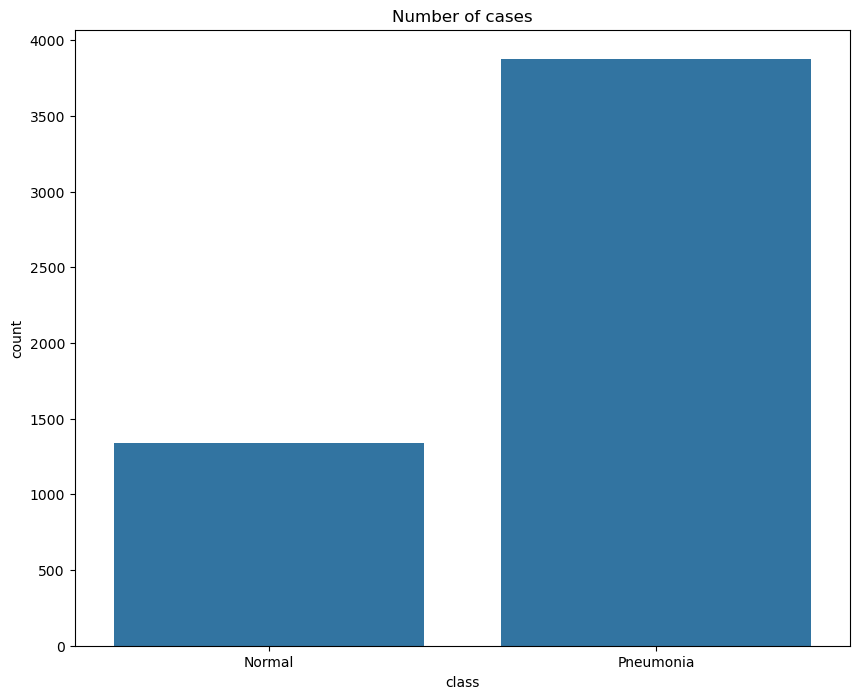

In [10]:

plt.figure(figsize=(10, 8))

plt.title('Number of cases', fontsize=12)
sns.countplot(x='class', data=df_train)

plt.show()


### Sample Images

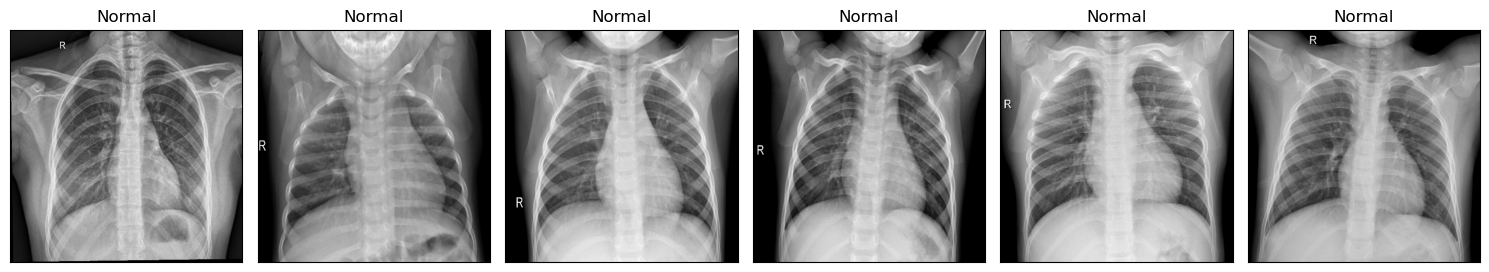

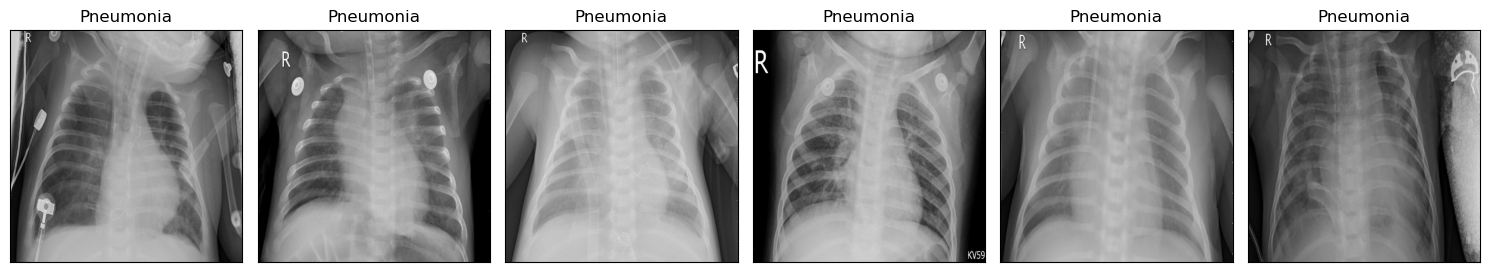

In [11]:
# plotting some sample images

# normal images
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()    
plt.show()

#pneumonia images
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()    
plt.show()

### Data Preparation

In [12]:
# splitting training and testing data

from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = 13, stratify = df_train['class'])

In [13]:
val_df

,class,image
4351,Pneumonia,chest_xray/train/PNEUMONIA/person820_virus_145...
4690,Pneumonia,chest_xray/train/PNEUMONIA/person774_bacteria_...
479,Normal,chest_xray/train/NORMAL/NORMAL2-IM-0970-0001.jpeg
4514,Pneumonia,chest_xray/train/PNEUMONIA/person967_virus_164...
2388,Pneumonia,chest_xray/train/PNEUMONIA/person550_bacteria_...
...,...,...
944,Normal,chest_xray/train/NORMAL/IM-0326-0001.jpeg
1952,Pneumonia,chest_xray/train/PNEUMONIA/person1400_bacteria...
558,Normal,chest_xray/train/NORMAL/IM-0487-0001.jpeg
1241,Normal,chest_xray/train/NORMAL/IM-0533-0001-0001.jpeg


### Preprocessing the dataset using ImageDataGenerator

In [15]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator


In [16]:
train_datagen = ImageDataGenerator(
                rescale = 1/255)

val_datagen = ImageDataGenerator(
              rescale = 1/255)

In [17]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

test_generator = val_datagen.flow_from_dataframe(
    df_test,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


### Model Architecture

In [18]:
# importing the necessary packages
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [19]:
#building the CNN

model = Sequential()

# convolution
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(150,150,3)))

# pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd conv
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

# 2nd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Conv
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 3rd Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten layer
model.add(Flatten())

# fully connected layers
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# compiling
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,207,457 (4.61 MB)

 Trainable params: 1,207,457 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

The number of parameters are calculated like this:

**1. For Conv. Layers:**
   
   no. of parameters = output_channels * (input_channels * window_size + 1)
   
   
**2. For Dense Layers:**
    
   no. of parameters = output_size * (input_size + 1)

### Training the model

In [22]:
# training the model and validation with testing data

cnn_model = model.fit(
            train_generator,
            epochs=10,
            validation_data=val_generator)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.8105 - loss: 0.4551 - val_accuracy: 0.9607 - val_loss: 0.1254
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - accuracy: 0.9632 - loss: 0.1009 - val_accuracy: 0.9684 - val_loss: 0.0948
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step - accuracy: 0.9754 - loss: 0.0749 - val_accuracy: 0.9607 - val_loss: 0.1174
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.9749 - loss: 0.0711 - val_accuracy: 0.9598 - val_loss: 0.1056
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.9810 - loss: 0.0557 - val_accuracy: 0.9636 - val_loss: 0.1368
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.9746 - loss: 0.0703 - val_accuracy: 0.9703 - val_loss: 0.0795
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9722 - val_loss: 0.0808
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.9893 - loss: 0

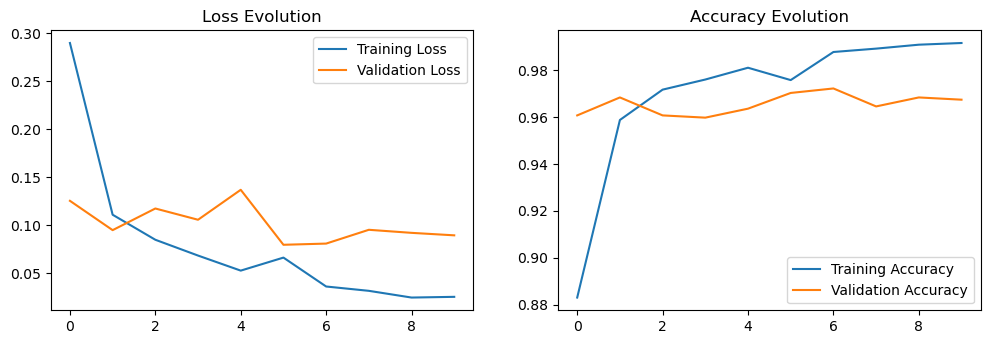

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn_model.history['loss'], label='Training Loss')
plt.plot(cnn_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn_model.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

### Performance Metrics

In [24]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.7409 - loss: 1.8611 
Test Accuracy: 73.24%
131/131 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.9931 - loss: 0.0184
Train Accuracy: 99.33%


In [25]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


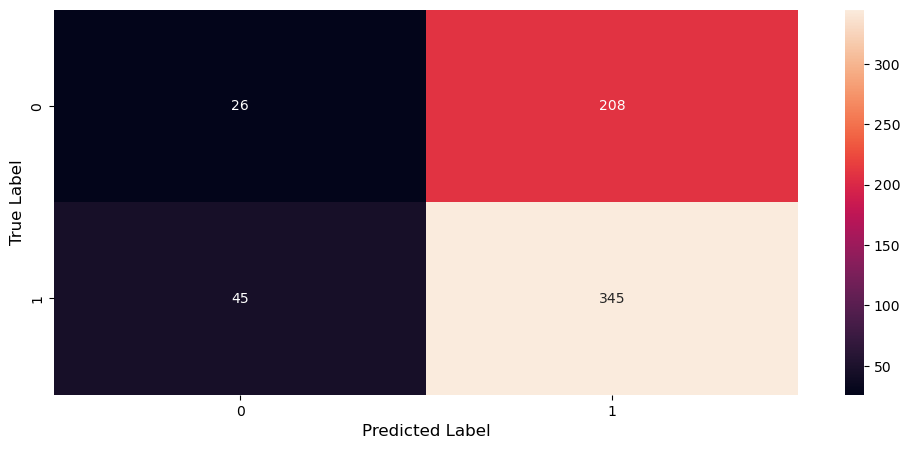

In [26]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [27]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))

Recall of the model is 0.88
Precision of the model is 0.62
F1-score: 0.7317073170731707


### Image Augmentation

In [28]:
train_datagen_2 = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                rotation_range=10,
                fill_mode="nearest")

val_datagen = ImageDataGenerator(
              rescale = 1./255)

In [29]:
train_generator_2 = train_datagen_2.flow_from_dataframe(
    train_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

test_generator = val_datagen.flow_from_dataframe(
    df_test,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7,
    shuffle=False
)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


### Hyperparameter tuning

In [30]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [40]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, min_delta=0.0001, patience=1, verbose=1)

filepath="weights.keras"
checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

In [41]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(150,150,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(1, activation="sigmoid"))

In [42]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,281,569 (43.04 MB)

 Trainable params: 11,281,121 (43.03 MB)

 Non-trainable params: 448 (1.75 KB)

In [44]:
# training the model

model_htuning = model.fit(
            train_generator_2,
            epochs=10,
            validation_data=val_generator,
            callbacks=[lr_reduce,checkpoint])

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.8045 - loss: 0.5598 
Epoch 1: val_accuracy improved from -inf to 0.74330, saving model to weights.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 68s 512ms/step - accuracy: 0.8049 - loss: 0.5586 - val_accuracy: 0.7433 - val_loss: 5.9838 - learning_rate: 0.0010
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9073 - loss: 0.2428 
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 2: val_accuracy did not improve from 0.74330
131/131 ━━━━━━━━━━━━━━━━━━━━ 71s 538ms/step - accuracy: 0.9073 - loss: 0.2427 - val_accuracy: 0.7433 - val_loss: 1.0844 - learning_rate: 0.0010
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.9209 - loss: 0.2094 
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 3: val_accuracy did not improve from 0.74330
131/131 ━━━━━━━━━━━━━━━━━━━━ 66s 499ms/step - accuracy: 0.9209 - loss: 0.2093 - val_accuracy: 0.7433 - v

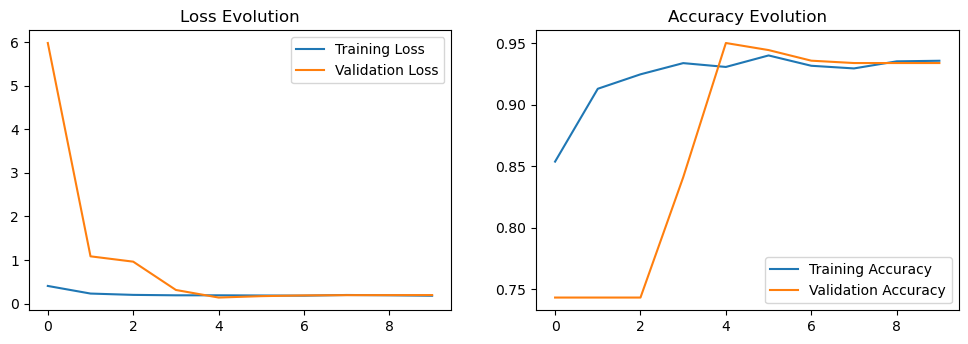

In [45]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model_htuning.history['loss'], label='Training Loss')
plt.plot(model_htuning.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(model_htuning.history['accuracy'], label='Training Accuracy')
plt.plot(model_htuning.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [46]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator_2)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.8448 - loss: 0.5375
Test Accuracy: 89.90%
131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 0.9574 - loss: 0.1645
Train Accuracy: 95.21%


In [47]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step


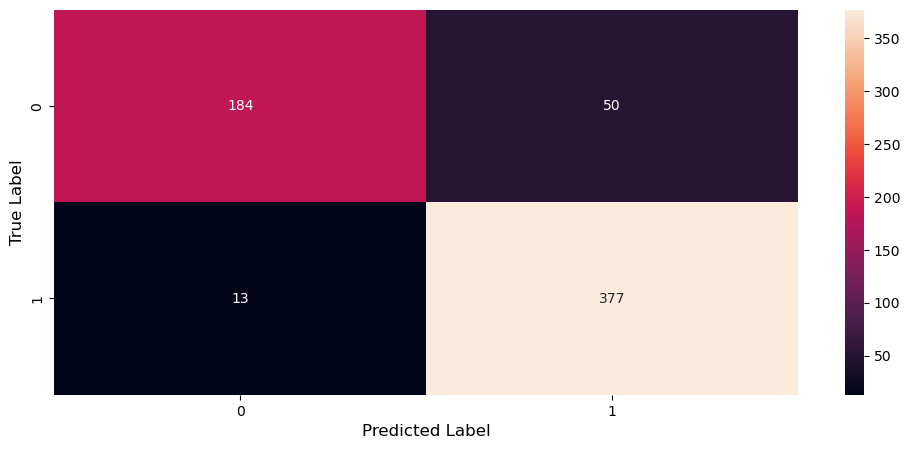

In [48]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [49]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))

Recall of the model is 0.97
Precision of the model is 0.88
F1-score: 0.9228886168910648


### Transfer Learning

In [50]:
from tensorflow.keras.applications import ResNet152V2

In [51]:
resnet_base_model = ResNet152V2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

resnet_base_model.summary()

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 348s 1us/step


Model: "resnet152v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 40, 40,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 38, 38,    │          0 │ conv2_block1_0_c

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 58,187,904 (221.97 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [52]:
# transfer learning network

model_tl = Sequential()
model_tl.add(resnet_base_model)
model_tl.add(Flatten())

model_tl.add(Dense(1024,activation="relu"))
model_tl.add(BatchNormalization())
model_tl.add(Dropout(rate=0.5))

model_tl.add(Dense(128,activation="relu"))
model_tl.add(BatchNormalization())
model_tl.add(Dropout(rate=0.4))

model_tl.add(Dense(1, activation="sigmoid"))

In [53]:
model_tl.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 5, 5, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    52,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,897,409 (423.04 MB)

 Trainable params: 110,751,361 (422.48 MB)

 Non-trainable params: 146,048 (570.50 KB)

In [54]:
#freeze initial layers of the network
resnet_base_model.trainable = False

In [55]:
model_tl.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [56]:
model_tl_final = model_tl.fit(
            train_generator_2,
            epochs=10,
            validation_data=val_generator,
            callbacks=[lr_reduce,checkpoint])

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8654 - loss: 0.3932  
Epoch 1: val_accuracy did not improve from 0.95019
131/131 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8657 - loss: 0.3925 - val_accuracy: 0.9234 - val_loss: 0.3645 - learning_rate: 0.0010
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9328 - loss: 0.2154     
Epoch 2: val_accuracy improved from 0.95019 to 0.95498, saving model to weights.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9328 - loss: 0.2153 - val_accuracy: 0.9550 - val_loss: 0.1248 - learning_rate: 0.0010
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9441 - loss: 0.1656  
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 3: val_accuracy did not improve from 0.95498
131/131 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9441 - loss: 0.1656 - val_accuracy: 0.9502 - val_loss: 0.1579 - learning_rate: 0.0010
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1

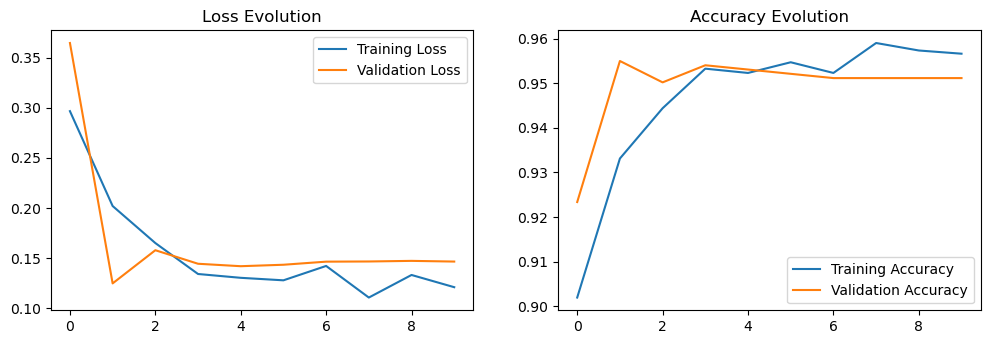

In [57]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model_tl_final.history['loss'], label='Training Loss')
plt.plot(model_tl_final.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(model_tl_final.history['accuracy'], label='Training Accuracy')
plt.plot(model_tl_final.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [58]:
evaluation = model_tl.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_tl.evaluate(train_generator_2)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 871ms/step - accuracy: 0.8209 - loss: 0.4358
Test Accuracy: 88.78%
131/131 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9742 - loss: 0.0789   
Train Accuracy: 97.24%


20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step  


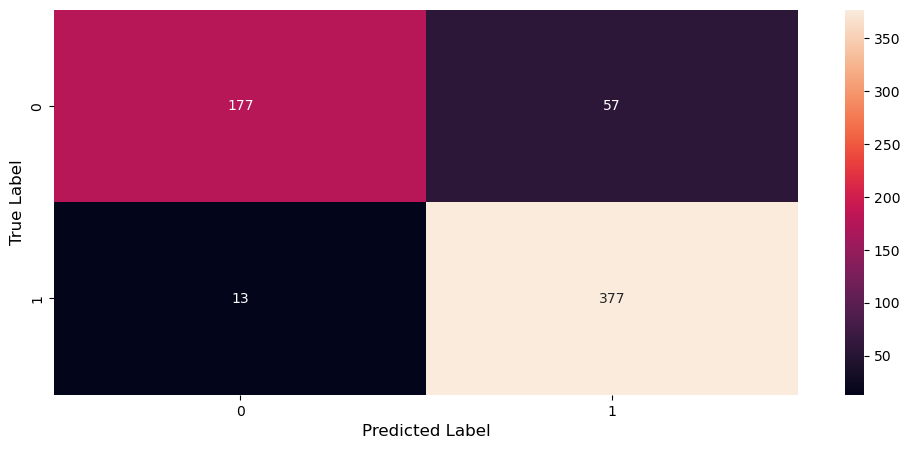

In [59]:
y_true = test_generator.classes
y_pred = (model_tl.predict(test_generator) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [60]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))

Recall of the model is 0.97
Precision of the model is 0.87
F1-score: 0.9150485436893204
